In [16]:
import pandas as pd
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

print(pd.__version__)
print(np.__version__)


2.2.3
2.0.2


In [17]:
#path_to_images = '/Users/elichesnut/Documents/GitHub/MLLab6/images'
path_to_images = '/Users/kierstenwener/Downloads/images 2'

images = []
labels = []
dog_breeds = ['american','wheaten','staffordshire','shiba','scottish','samoyed','saint','pug','pomeranian','newfoundland','miniature','leonberger','keeshond','japanese','havanese','great','german','english','chihuahua','boxer','beagle','basset']

for filename in os.listdir(path_to_images):
    if filename.endswith('.jpg'):
        img_path = os.path.join(path_to_images, filename)
        #resize the images
        img = Image.open(img_path).convert('RGB')
        img = img.resize((64, 64))
        images.append(np.array(img))#adds the individual image to the array of images 
        label = filename.split('_')[0] #this gets the breed name 
        #int encode target integer, 0 is dog 1 is cat
        if label in dog_breeds:
            label = 0
        else:
            label = 1
        labels.append(label) #appends the picture label to the label vector 

# combined = list(zip(images, labels))
combined = list(zip(images, labels))
np.random.shuffle(combined)
images, labels = zip(*combined)
subset_images = images[:1000]
subset_labels = labels[:1000]



X_train, X_test, y_train, y_test = train_test_split(subset_images, subset_labels, test_size=0.2)

In [18]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

import numpy as np

# Convert image data lists to NumPy arrays

X_test = np.array(X_test).astype('float32') / 255.0 
X_train = np.array(X_train).astype('float32') / 255.0 

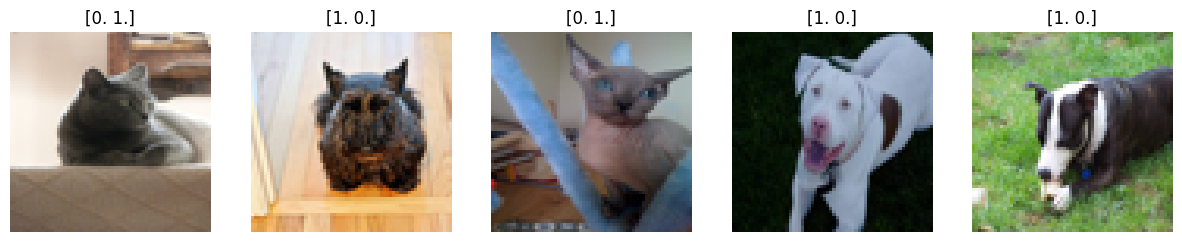

(64, 64, 3)


In [19]:
plt.figure(figsize=(15, 10))

for i in range(5):
    plt.subplot(1, 5, i + 1)  
    plt.title(y_train[i])
    plt.imshow(X_train[i]) 
    plt.axis('off')  

plt.show()  # 
print(subset_images[0].shape)

In [20]:
from sklearn import metrics as mt
from matplotlib import pyplot as plt
from skimage.io import imshow
import seaborn as sns
%matplotlib inline
labels = ['Dog', 'Cat']
def summarize_net(net, X_test, y_test, title_text=''):
    plt.figure(figsize=(15,5))
    yhat = np.argmax(net.predict(X_test), axis=1)
    y_test_single = np.argmax(y_test, axis=1)


    acc = mt.accuracy_score(y_test_single,yhat)
    cm = mt.confusion_matrix(y_test_single,yhat)
    cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=labels,yticklabels=labels)
    plt.title(title_text+'{:.4f}'.format(acc))

In [21]:
%%time 

import setuptools.dist
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten 
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import RandomFlip, RandomRotation


cnn = Sequential()

# add in augmentations directly
cnn.add( RandomFlip("horizontal") )
cnn.add( RandomRotation(0.2) )

# let's start with an AlexNet style convolutional phase
cnn.add(Conv2D(filters=32,
                input_shape = (64,64,1),
                kernel_size=(3,3), 
                padding='same', 
                activation='relu')) # more compact syntax

# no max pool before next conv layer!!
cnn.add(Conv2D(filters=64,
                kernel_size=(3,3), 
                padding='same', 
                activation='relu')) # more compact syntax
cnn.add(MaxPooling2D(pool_size=(2, 2)))
    

# add one layer on flattened output
cnn.add(Dropout(0.25)) # add some dropout for regularization after conv layers
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5)) # add some dropout for regularization, again!
cnn.add(Dense(2, activation='softmax'))

# Let's train the model 
cnn.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
              optimizer='rmsprop', # 'adadelta' 'rmsprop'
              metrics=['accuracy'])

cnn.build((None,28,28,1))

cnn.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip_2 (RandomFlip)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_2               │ (None, 28, 28, 1)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,624,834 (6.20 MB)

 Trainable params: 1,624,834 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

CPU times: user 25.5 ms, sys: 5.58 ms, total: 31.1 ms
Wall time: 20.6 ms


In [22]:
history = cnn.fit(X_train, y_train, batch_size=32, 
                   epochs=15, verbose=1,
                   validation_data=(X_test,y_test)
                  )

Epoch 1/15


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "conv2d_4" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (32, 64, 64, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 64, 64, 3), dtype=float32)
  • training=True
  • mask=None